In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers as opt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
import pandas as pd
import seaborn as sns
import shap

In [2]:
DATA_PATH="/home/rakibul/WORK/Work/Thesis/Speech_Recognition/Vowel_Word/GitHub Repo/Vowel_Data/Formant/"

In [2]:
seed=42
n_epochs=300

In [4]:
def get_formant(file_path):
    formant=pd.read_csv(file_path,
                delim_whitespace=True,
                header=None,
                names=["time","F1","F2","F3","F4","F5"],
                dtype=np.float64,
                na_values="--undefined--")
    return formant

def get_all_formants(path=DATA_PATH):
    labels=sorted(os.listdir(path))
    all_formant=pd.DataFrame() #empty dataframe to store all_formants
    
    for label_index,label in enumerate(labels):
        folder_formant=pd.DataFrame() #empty dataframe to store formants of indivuals vowels/words i.e. folders

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Reading Formants of label -'{}'".format(label)):
            #print(file)
            individual_formant=get_formant(file_path=file)
            
            folder_formant=folder_formant.append(individual_formant,ignore_index=True)
            
        folder_formant['label']=label_index  #new columns for encoding label
        
        all_formant=all_formant.append(folder_formant,ignore_index=True)     
    return all_formant

def get_train_test(split_ratio=0.8,random_state=seed):
    all_formants=get_all_formants()
    
    y=all_formants['label'].values
 
    only_formants=all_formants.drop(labels=['time','label'],axis=1)
    
    standard_formants=(only_formants-only_formants.mean())/only_formants.std()
    
    X=standard_formants.values   

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [5]:
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 422.26it/s]


In [6]:
np.random.seed(seed)

In [7]:
model_v=Sequential()
model_v.add(Dense(128, activation='tanh',input_shape=(X_train.shape[1],)))
model_v.add(Dense(128, activation='tanh'))
model_v.add(Dense(64, activation='tanh'))
model_v.add(Dense(32, activation='tanh'))
model_v.add(Dense(16, activation='tanh'))
model_v.add(Dense(7, activation='softmax'))

In [8]:
model_v.compile(
    optimizer=opt.Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    #metrics=['AUC']#,
    metrics=['accuracy']
#     metrics=[['accuracy','AUC']]
)

In [9]:
history_v=model_v.fit(X_train, y_train_hot, epochs=n_epochs, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/300
1/1 [==============================] - 0s 248ms/step - loss: 2.0218 - accuracy: 0.1574 - val_loss: 1.6511 - val_accuracy: 0.4197
Epoch 2/300
1/1 [==============================] - 0s 45ms/step - loss: 1.6440 - accuracy: 0.4314 - val_loss: 1.5084 - val_accuracy: 0.4299
Epoch 3/300
1/1 [==============================] - 0s 43ms/step - loss: 1.4996 - accuracy: 0.4472 - val_loss: 1.4296 - val_accuracy: 0.4846
Epoch 4/300
1/1 [==============================] - 0s 46ms/step - loss: 1.4228 - accuracy: 0.4900 - val_loss: 1.3695 - val_accuracy: 0.5083
Epoch 5/300
1/1 [==============================] - 0s 55ms/step - loss: 1.3656 - accuracy: 0.5246 - val_loss: 1.3237 - val_accuracy: 0.5048
Epoch 6/300
1/1 [==============================] - 0s 56ms/step - loss: 1.3224 - accuracy: 0.5049 - val_loss: 1.2866 - val_accuracy: 0.4921
Epoch 7/300
1/1 [==============================] - 0s 45ms/step - loss: 1.2874 - accuracy: 0.4996 - val_loss: 1.2559 - val_accuracy: 0.5072
Epoch 8/300
1/1 [==

Epoch 117/300
1/1 [==============================] - 0s 44ms/step - loss: 0.4701 - accuracy: 0.8324 - val_loss: 0.4767 - val_accuracy: 0.8429
Epoch 118/300
1/1 [==============================] - 0s 46ms/step - loss: 0.4609 - accuracy: 0.8382 - val_loss: 0.4829 - val_accuracy: 0.8352
Epoch 119/300
1/1 [==============================] - 0s 45ms/step - loss: 0.4645 - accuracy: 0.8350 - val_loss: 0.4748 - val_accuracy: 0.8362
Epoch 120/300
1/1 [==============================] - 0s 38ms/step - loss: 0.4591 - accuracy: 0.8385 - val_loss: 0.4691 - val_accuracy: 0.8415
Epoch 121/300
1/1 [==============================] - 0s 64ms/step - loss: 0.4516 - accuracy: 0.8406 - val_loss: 0.4730 - val_accuracy: 0.8366
Epoch 122/300
1/1 [==============================] - 0s 161ms/step - loss: 0.4541 - accuracy: 0.8404 - val_loss: 0.4665 - val_accuracy: 0.8394
Epoch 123/300
1/1 [==============================] - 0s 37ms/step - loss: 0.4502 - accuracy: 0.8429 - val_loss: 0.4611 - val_accuracy: 0.8426
Epoch

Epoch 175/300
1/1 [==============================] - 0s 43ms/step - loss: 0.3380 - accuracy: 0.8836 - val_loss: 0.3881 - val_accuracy: 0.8680
Epoch 176/300
1/1 [==============================] - 0s 36ms/step - loss: 0.3402 - accuracy: 0.8842 - val_loss: 0.3992 - val_accuracy: 0.8680
Epoch 177/300
1/1 [==============================] - 0s 38ms/step - loss: 0.3520 - accuracy: 0.8785 - val_loss: 0.4131 - val_accuracy: 0.8563
Epoch 178/300
1/1 [==============================] - 0s 39ms/step - loss: 0.3651 - accuracy: 0.8682 - val_loss: 0.4119 - val_accuracy: 0.8627
Epoch 179/300
1/1 [==============================] - 0s 44ms/step - loss: 0.3598 - accuracy: 0.8746 - val_loss: 0.3788 - val_accuracy: 0.8719
Epoch 180/300
1/1 [==============================] - 0s 40ms/step - loss: 0.3304 - accuracy: 0.8867 - val_loss: 0.4004 - val_accuracy: 0.8602
Epoch 181/300
1/1 [==============================] - 0s 47ms/step - loss: 0.3491 - accuracy: 0.8778 - val_loss: 0.4009 - val_accuracy: 0.8666
Epoch 

Epoch 233/300
1/1 [==============================] - 0s 39ms/step - loss: 0.2617 - accuracy: 0.9118 - val_loss: 0.3512 - val_accuracy: 0.8874
Epoch 234/300
1/1 [==============================] - 0s 39ms/step - loss: 0.2594 - accuracy: 0.9110 - val_loss: 0.3429 - val_accuracy: 0.8874
Epoch 235/300
1/1 [==============================] - 0s 38ms/step - loss: 0.2516 - accuracy: 0.9137 - val_loss: 0.3441 - val_accuracy: 0.8881
Epoch 236/300
1/1 [==============================] - 0s 37ms/step - loss: 0.2541 - accuracy: 0.9145 - val_loss: 0.3507 - val_accuracy: 0.8856
Epoch 237/300
1/1 [==============================] - 0s 48ms/step - loss: 0.2560 - accuracy: 0.9129 - val_loss: 0.3418 - val_accuracy: 0.8895
Epoch 238/300
1/1 [==============================] - 0s 39ms/step - loss: 0.2486 - accuracy: 0.9138 - val_loss: 0.3409 - val_accuracy: 0.8885
Epoch 239/300
1/1 [==============================] - 0s 41ms/step - loss: 0.2470 - accuracy: 0.9163 - val_loss: 0.3483 - val_accuracy: 0.8878
Epoch 

Epoch 291/300
1/1 [==============================] - 0s 38ms/step - loss: 0.1881 - accuracy: 0.9385 - val_loss: 0.3273 - val_accuracy: 0.8990
Epoch 292/300
1/1 [==============================] - 0s 38ms/step - loss: 0.1857 - accuracy: 0.9401 - val_loss: 0.3255 - val_accuracy: 0.8998
Epoch 293/300
1/1 [==============================] - 0s 38ms/step - loss: 0.1836 - accuracy: 0.9409 - val_loss: 0.3278 - val_accuracy: 0.8976
Epoch 294/300
1/1 [==============================] - 0s 41ms/step - loss: 0.1834 - accuracy: 0.9409 - val_loss: 0.3263 - val_accuracy: 0.9012
Epoch 295/300
1/1 [==============================] - 0s 53ms/step - loss: 0.1830 - accuracy: 0.9394 - val_loss: 0.3281 - val_accuracy: 0.8983
Epoch 296/300
1/1 [==============================] - 0s 43ms/step - loss: 0.1811 - accuracy: 0.9417 - val_loss: 0.3260 - val_accuracy: 0.9026
Epoch 297/300
1/1 [==============================] - 0s 41ms/step - loss: 0.1783 - accuracy: 0.9419 - val_loss: 0.3244 - val_accuracy: 0.9008
Epoch 

In [10]:
model_v.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 119       
Total params: 28,263
Trainable params: 28,263
Non-trainable params: 0
____________________________________________________

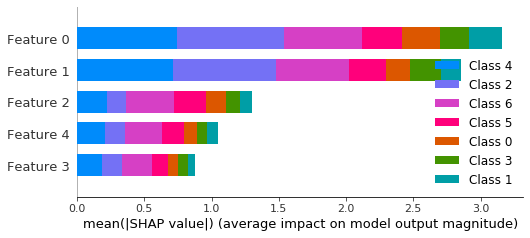

In [11]:
e=shap.DeepExplainer(model_v,X_test)
shape_values=e.shap_values(X_test)
shap.summary_plot(shape_values,X_test)

In [10]:
history_dict_v=history_v.history

loss_v=history_dict_v['loss']
val_loss_v=history_dict_v['val_loss']

acc_v=history_dict_v['accuracy']
val_acc_v=history_dict_v['val_accuracy']

# auc_v=history_dict_v['auc']
# val_auc_v=history_dict_v['val_auc']

In [11]:
epochs=range(1,len(loss_v)+1)
ticks=[1]
ticks2=[i for i in range(30,len(loss_v)+1,30)]
ticks.extend(ticks2)

In [11]:
save_specifier='new_conf_5F_HL5_tanh_adam_005_batchfull_seed42'

[<matplotlib.lines.Line2D at 0x7fe0e46a7cd0>]

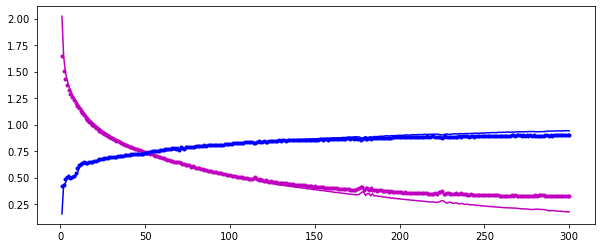

In [12]:
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_v,'m', label='Training Loss')
plt.plot(epochs,val_loss_v,'m.', label='Validation Loss')

plt.plot(epochs,acc_v,'b', label='Training ACC')
plt.plot(epochs,val_acc_v,'b.', label='Validation ACC')

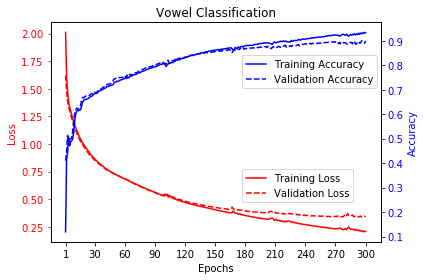

In [78]:
fig, ax=plt.subplots()
ln1=ax.plot(epochs,loss_v,'r', label='Training Loss')
ln2=ax.plot(epochs,val_loss_v,'r--', label='Validation Loss')

ax2=ax.twinx()
#ln3=ax2.plot(epochs,auc_v,'r', label='Training AUC')
#ln3=ax2.plot(epochs,val_auc_v,'o', label='Validation AUC')

ln3=ax2.plot(epochs,acc_v,'b', label='Training Accuracy')
ln3=ax2.plot(epochs,val_acc_v,'b--', label='Validation Accuracy')

ax.set_title('Vowel Classification')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
#ax2.set_ylabel('AUC - ROC')
ax2.set_ylabel('Accuracy')

plt.xticks(ticks)
ax.legend(loc=(0.58,0.18))
ax2.legend(loc=(0.58,0.7))
#fig.legend(loc=(0.6,0.4))
ax.yaxis.label.set_color('red')
ax.tick_params(axis='y', colors='red')

ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

plt.tight_layout()
plt.savefig('./New_without_CNN/loss_acc_vowel_'+save_specifier+'.pdf',format='pdf', dpi=600)

In [70]:
DATA_PATH="/home/rakibul/WORK/Work/Thesis/Speech_Recognition/Vowel_Word/GitHub Repo/Word_Data/Formant/"

In [80]:
def get_formant(file_path):
    formant=pd.read_csv(file_path,
                delim_whitespace=True,
                header=None,
                names=["time","F1","F2","F3","F4","F5"],
                dtype=np.float64,
                na_values="--undefined--")
    return formant

def get_all_formants(path=DATA_PATH):
    labels=sorted(os.listdir(path))
    all_formant=pd.DataFrame() #empty dataframe to store all_formants
    
    for label_index,label in enumerate(labels):
        folder_formant=pd.DataFrame() #empty dataframe to store formants of indivuals vowels/words i.e. folders

        formant_files=[path + label + '/' + file for file in sorted(os.listdir(path+'/'+label))]
        for file in tqdm(formant_files,"Reading Formants of label -'{}'".format(label)):
            #print(file)
            individual_formant=get_formant(file_path=file)

            folder_formant=folder_formant.append(individual_formant,ignore_index=True)
        
        folder_formant['label']=label_index  #new columns for encoding label
        
        all_formant=all_formant.append(folder_formant,ignore_index=True)     
    return all_formant

def get_train_test(split_ratio=0.8,random_state=42):
    all_formants=get_all_formants()
    
    y=all_formants['label'].values
 
    only_formants=all_formants.drop(labels=['time','label'],axis=1)
    
    standard_formants=(only_formants-only_formants.mean())/only_formants.std()
    
    X=standard_formants.values   

    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True,stratify=y)

In [81]:
np.random.seed(seed)
X_train, X_test, y_train, y_test=get_train_test()
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

Reading Formants of label -'Formant7': 100%|██████████| 40/40 [00:00<00:00, 322.36it/s]


In [82]:
model_w=Sequential()
model_w.add(Dense(128, activation='tanh',input_shape=(X_train.shape[1],)))
model_w.add(Dropout(0.45))
model_w.add(Dense(128, activation='tanh'))
# model_w.add(Dropout(0.15))
model_w.add(Dense(64, activation='tanh'))
# model_w.add(Dropout(0.15))
model_w.add(Dense(32, activation='tanh'))
model_w.add(Dense(16, activation='tanh'))
model_w.add(Dense(7, activation='softmax'))

In [83]:
model_w.compile(
    optimizer=opt.Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    #metrics=['AUC']#,
    metrics=['accuracy']
#     metrics=[['accuracy','AUC']]
)

In [84]:
history_w=model_w.fit(X_train, y_train_hot, epochs=n_epochs, batch_size=X_train.shape[0], validation_data=(X_test,y_test_hot))

Epoch 1/300
1/1 [==============================] - 0s 171ms/step - loss: 2.0527 - accuracy: 0.1271 - val_loss: 1.8535 - val_accuracy: 0.2969
Epoch 2/300
1/1 [==============================] - 0s 45ms/step - loss: 1.8540 - accuracy: 0.2840 - val_loss: 1.7572 - val_accuracy: 0.3136
Epoch 3/300
1/1 [==============================] - 0s 47ms/step - loss: 1.7612 - accuracy: 0.3194 - val_loss: 1.7177 - val_accuracy: 0.3250
Epoch 4/300
1/1 [==============================] - 0s 54ms/step - loss: 1.7222 - accuracy: 0.3288 - val_loss: 1.7017 - val_accuracy: 0.3365
Epoch 5/300
1/1 [==============================] - 0s 44ms/step - loss: 1.7029 - accuracy: 0.3390 - val_loss: 1.6784 - val_accuracy: 0.3492
Epoch 6/300
1/1 [==============================] - 0s 53ms/step - loss: 1.6826 - accuracy: 0.3421 - val_loss: 1.6545 - val_accuracy: 0.3598
Epoch 7/300
1/1 [==============================] - 0s 48ms/step - loss: 1.6591 - accuracy: 0.3483 - val_loss: 1.6429 - val_accuracy: 0.3560
Epoch 8/300
1/1 [==

1/1 [==============================] - 0s 45ms/step - loss: 1.3978 - accuracy: 0.4567 - val_loss: 1.3987 - val_accuracy: 0.4617
Epoch 60/300
1/1 [==============================] - 0s 42ms/step - loss: 1.3955 - accuracy: 0.4615 - val_loss: 1.3935 - val_accuracy: 0.4634
Epoch 61/300
1/1 [==============================] - 0s 41ms/step - loss: 1.3887 - accuracy: 0.4607 - val_loss: 1.3885 - val_accuracy: 0.4652
Epoch 62/300
1/1 [==============================] - 0s 54ms/step - loss: 1.3881 - accuracy: 0.4570 - val_loss: 1.3840 - val_accuracy: 0.4655
Epoch 63/300
1/1 [==============================] - 0s 50ms/step - loss: 1.3794 - accuracy: 0.4628 - val_loss: 1.3794 - val_accuracy: 0.4675
Epoch 64/300
1/1 [==============================] - 0s 53ms/step - loss: 1.3727 - accuracy: 0.4669 - val_loss: 1.3748 - val_accuracy: 0.4688
Epoch 65/300
1/1 [==============================] - 0s 44ms/step - loss: 1.3725 - accuracy: 0.4686 - val_loss: 1.3700 - val_accuracy: 0.4698
Epoch 66/300
1/1 [========

1/1 [==============================] - 0s 43ms/step - loss: 1.2094 - accuracy: 0.5383 - val_loss: 1.2178 - val_accuracy: 0.5292
Epoch 118/300
1/1 [==============================] - 0s 36ms/step - loss: 1.2078 - accuracy: 0.5427 - val_loss: 1.2176 - val_accuracy: 0.5356
Epoch 119/300
1/1 [==============================] - 0s 37ms/step - loss: 1.2077 - accuracy: 0.5405 - val_loss: 1.2179 - val_accuracy: 0.5307
Epoch 120/300
1/1 [==============================] - 0s 45ms/step - loss: 1.2063 - accuracy: 0.5427 - val_loss: 1.2216 - val_accuracy: 0.5317
Epoch 121/300
1/1 [==============================] - 0s 48ms/step - loss: 1.2080 - accuracy: 0.5336 - val_loss: 1.2135 - val_accuracy: 0.5345
Epoch 122/300
1/1 [==============================] - 0s 63ms/step - loss: 1.2041 - accuracy: 0.5425 - val_loss: 1.2096 - val_accuracy: 0.5373
Epoch 123/300
1/1 [==============================] - 0s 49ms/step - loss: 1.1977 - accuracy: 0.5437 - val_loss: 1.2078 - val_accuracy: 0.5409
Epoch 124/300
1/1 [=

Epoch 175/300
1/1 [==============================] - 0s 42ms/step - loss: 1.1180 - accuracy: 0.5762 - val_loss: 1.1424 - val_accuracy: 0.5675
Epoch 176/300
1/1 [==============================] - 0s 67ms/step - loss: 1.1150 - accuracy: 0.5790 - val_loss: 1.1406 - val_accuracy: 0.5716
Epoch 177/300
1/1 [==============================] - 0s 39ms/step - loss: 1.1145 - accuracy: 0.5797 - val_loss: 1.1423 - val_accuracy: 0.5716
Epoch 178/300
1/1 [==============================] - 0s 40ms/step - loss: 1.1167 - accuracy: 0.5771 - val_loss: 1.1393 - val_accuracy: 0.5683
Epoch 179/300
1/1 [==============================] - 0s 45ms/step - loss: 1.1189 - accuracy: 0.5767 - val_loss: 1.1363 - val_accuracy: 0.5731
Epoch 180/300
1/1 [==============================] - 0s 39ms/step - loss: 1.1129 - accuracy: 0.5819 - val_loss: 1.1412 - val_accuracy: 0.5683
Epoch 181/300
1/1 [==============================] - 0s 37ms/step - loss: 1.1185 - accuracy: 0.5732 - val_loss: 1.1385 - val_accuracy: 0.5701
Epoch 

Epoch 233/300
1/1 [==============================] - 0s 35ms/step - loss: 1.0579 - accuracy: 0.6008 - val_loss: 1.1018 - val_accuracy: 0.5856
Epoch 234/300
1/1 [==============================] - 0s 45ms/step - loss: 1.0547 - accuracy: 0.6019 - val_loss: 1.1001 - val_accuracy: 0.5868
Epoch 235/300
1/1 [==============================] - 0s 57ms/step - loss: 1.0526 - accuracy: 0.6054 - val_loss: 1.0962 - val_accuracy: 0.5858
Epoch 236/300
1/1 [==============================] - 0s 39ms/step - loss: 1.0517 - accuracy: 0.6035 - val_loss: 1.0973 - val_accuracy: 0.5871
Epoch 237/300
1/1 [==============================] - 0s 47ms/step - loss: 1.0538 - accuracy: 0.6019 - val_loss: 1.0975 - val_accuracy: 0.5851
Epoch 238/300
1/1 [==============================] - 0s 38ms/step - loss: 1.0514 - accuracy: 0.6035 - val_loss: 1.0972 - val_accuracy: 0.5891
Epoch 239/300
1/1 [==============================] - 0s 39ms/step - loss: 1.0509 - accuracy: 0.6010 - val_loss: 1.0965 - val_accuracy: 0.5912
Epoch 

Epoch 291/300
1/1 [==============================] - 0s 44ms/step - loss: 1.0075 - accuracy: 0.6200 - val_loss: 1.0640 - val_accuracy: 0.6026
Epoch 292/300
1/1 [==============================] - 0s 42ms/step - loss: 1.0068 - accuracy: 0.6225 - val_loss: 1.0669 - val_accuracy: 0.6003
Epoch 293/300
1/1 [==============================] - 0s 44ms/step - loss: 1.0064 - accuracy: 0.6222 - val_loss: 1.0676 - val_accuracy: 0.6031
Epoch 294/300
1/1 [==============================] - 0s 48ms/step - loss: 1.0059 - accuracy: 0.6215 - val_loss: 1.0660 - val_accuracy: 0.6034
Epoch 295/300
1/1 [==============================] - 0s 46ms/step - loss: 1.0075 - accuracy: 0.6181 - val_loss: 1.0647 - val_accuracy: 0.6034
Epoch 296/300
1/1 [==============================] - 0s 46ms/step - loss: 0.9999 - accuracy: 0.6231 - val_loss: 1.0650 - val_accuracy: 0.6039
Epoch 297/300
1/1 [==============================] - 0s 50ms/step - loss: 1.0036 - accuracy: 0.6230 - val_loss: 1.0683 - val_accuracy: 0.6003
Epoch 

In [85]:
history_dict_w=history_w.history
loss_w=history_dict_w['loss']
val_loss_w=history_dict_w['val_loss']

acc_w=history_dict_w['accuracy']
val_acc_w=history_dict_w['val_accuracy']

# auc_w=history_dict_w['auc']
# val_auc_w=history_dict_w['val_auc']

In [86]:
save_specifier='new_conf_5F_HL5_tanh_adam_005_batchfull_seed42_dropout6'

In [87]:
epochs_w=range(1,len(loss_w)+1)
ticks_w=[1]
ticks2_w=[i for i in range(30,len(loss_w)+1,30)]
ticks_w.extend(ticks2_w)

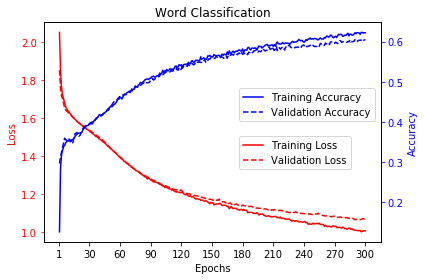

In [88]:
fig, ax=plt.subplots()
ln1=ax.plot(epochs_w,loss_w,'r', label='Training Loss')
ln2=ax.plot(epochs_w,val_loss_w,'r--', label='Validation Loss')

ax2=ax.twinx()
#ln3=ax2.plot(epochs_w,auc_w,'b', label='Training AUC')
#ln3=ax2.plot(epochs_w,val_auc_w,'b.', label='Validation AUC')

ln3=ax2.plot(epochs_w,acc_w,'b', label='Training Accuracy')
ln3=ax2.plot(epochs_w,val_acc_w,'b--', label='Validation Accuracy')

ax.set_title('Word Classification')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
#ax2.set_ylabel('AUC - ROC')
ax2.set_ylabel('Accuracy')

plt.xticks(ticks_w)
ax.legend(loc=(0.58,0.33))
ax2.legend(loc=(0.58,0.55))
#fig.legend(loc=(0.6,0.4))
ax.yaxis.label.set_color('red')
ax.tick_params(axis='y', colors='red')

ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

plt.tight_layout()
plt.savefig('/home/rakibul/WORK/Work/Thesis/Speech_Recognition/Vowel_Word/GitHub Repo/Result/New_Studies_Conf/loss_acc_word_'+save_specifier+'.pdf',format='pdf', dpi=600)

In [24]:
model_w.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 119       
Total params: 28,903
Trainable params: 28,903
Non-trainable params: 0
__________________________________________________

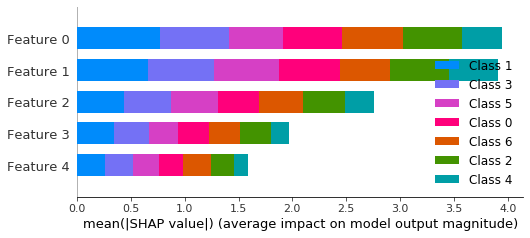

In [16]:
e=shap.DeepExplainer(model_w,X_test)
shape_values=e.shap_values(X_test)
shap.summary_plot(shape_values,X_test)

In [42]:
#COMPARE

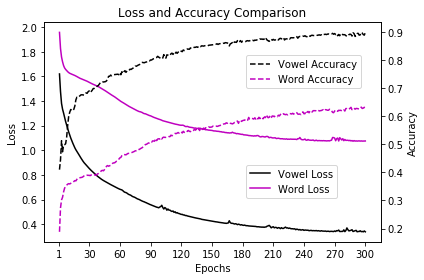

In [82]:
fig, ax=plt.subplots()
ln1=ax.plot(epochs,val_loss_v,'k', label='Vowel Loss')
ln2=ax.plot(epochs,val_loss_w,'m', label='Word Loss')

ax2=ax.twinx()
#ln3=ax2.plot(epochs,val_auc_v,'b--', label='Vowel AUC')
#ln3=ax2.plot(epochs,val_auc_w,'r--', label='Word AUC')

ln3=ax2.plot(epochs,val_acc_v,'k--', label='Vowel Accuracy')
ln3=ax2.plot(epochs,val_acc_w,'m--', label='Word Accuracy')

ax.set_title('Loss and Accuracy Comparison')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')

plt.xticks(ticks)
ax.legend(loc=(0.6,0.2))
ax2.legend(loc=(0.6,0.7))
#fig.legend(loc=(0.6,0.4))

plt.tight_layout()
plt.savefig('./New_without_CNN/comare_'+save_specifier+'.pdf',format='pdf', dpi=600)

In [83]:
all_compare_df=pd.DataFrame({'loss_v':loss_v,
                      'val_loss_v':val_loss_v,
                      'auc_v':auc_v,
                      'val_auc_v':val_auc_v,
                      'loss_w':loss_w,
                      'val_loss_w':val_loss_w,
                      'auc_w':auc_w,
                      'val_auc_w':val_auc_w
                     })

all_compare_df.to_csv('./New_without_CNN/all_compare_data_'+save_specifier+'.csv')